<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Project Title</h3> </center>
<center><h4>Glenn Billman, Shreya Yalamanchili, Sam Zlota</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Add your summary here (100-150 words)

Provide a brief summary of your project. After reading this executive summary, your readers should have a rough understanding of what you did in this project. You can think of this summary in terms of the four sections of the report and write 1-2 sentences describing each section.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

#### Problem Statement

Knowing what kind of music to release can be difficult for artists and producers, so this project can help users explore how popular a given song would be today. Artists would then know what type of music is the most popular, and can release songs accordingly. More specifically, our project is focused on predicting a song’s popularity based on features of the track. In this project, we sought to compare several supervised machine learning algorithms to determine the popularity of a given song. Through our analysis, we would like to learn more about what factors are important in determining how popular a song is, what types of songs are more popular, and why certain songs are more popular than others. 

#### Significance of the Problem
It is important to tackle this problem, because it increases efficiency in the music industry. Knowing what kind of music will be popular today makes it much easier for artists and producers to cater new music to these results. In the end, consumers are satisfied because they receive music they enjoy, and artists are satisfied because they realize increased profits. 
Insights from this project can also be useful in other ways. Seeing which of our features most affects popularity can tell artists and producers what to focus on in their music. Furthermore, looking at metrics such as when the song was released and how popular the artist(s) on the song are can provide additional insight on how features related to the song (but not part of the actual music) affect its popularity. 

* **(optional)** Has there been previous work on your topic in terms of applying ML techniques to analyze similar datasets? Do some research into your topic. What algorithms were used? What was the performance of those algorithms? Cite your sources appropriately. You can use the numbered reference format or APA (if you are more comfortable with it).

#### Questions/Hypothesis
Given the aforementioned problem and its importance, we set out to tackle the following questions:
* What features are important in determining popularity for a given song? Which features have comparatively little impact on determining popularity?
* Why are certain songs more popular than others?
* What types (genre, region, artist, etc.) of songs are the most popular? What types are least popular?
* Which ML algorithm is most accurate in predicting song popularity?
* How does the average popularity for a given group (genre, artist, release date) change over time?

Based on these questions, we have formulated a list of hypotheses:
* Songs that are released within the past 90 days will be categorized as popular.
* Songs that have an artist popularity above 85 will be categorized as popular.
* Songs that are from the pop genre will be categorized as popular. 
* Songs that are released closer to today will be more popular than songs that were released further in the past.
* Songs that have a medium-high value for “energy” will be more popular than other songs.
* Songs that have a high value for “danceability” will be more popular than other songs.
* Songs that have a higher artist popularity will be more popular than other songs.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

We retrieved our data for this project from Spotify’s API. To pull 10,000 random songs, we used the search feature of the Spotify API and a text file of the 20,000 most common English words. A word was searched for, and then an offset number between 0 and 200 was chosen to select a song from those results. Some obscure words did not yield results, in which case the loop would start over again with a new word. 

Once we had a dataframe of 10,000 songs, we needed to access the song’s traits. Using the song id, which was included in our original dataframe, we could access the tracks endpoint, which contained most of the information about the song, such as length, tempo, ect. The artist and album information was also stored in a dataframe. From the artist and album json blobs, the artist and album ids were retrieved. To access artist popularity, we used the artist id to access the artist endpoints. The release date was accessed via the album endpoint. 

The raw data set had 10,000 rows with 18 columns. This included general information about a song such as track, artist, id, release date and search term, as well as the song’s qualities, which Spotify determined. There are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, popularity and artist popularity. 


### 2.2. Data Analysis
The hypothesis our project will test is that songs that are released within the past 90 days will be categorized as popular. For this hypothesis, the independent variable is the song’s days since release and the dependent variable is the popularity index. 

Our predictive model is based on 14 features, which produces one target variable. The outcome variable we are going to predict is a popularity index, which Spotify calculates as an integer between 1-100, with 0 being the least popular and 100 being the most popular. This number is based on the total number of plays and how recent they were. The features are danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, days since release and artist popularity. These are important predictors for popularity, because they are all unique features of the song and the environment around the song (artist/release date). How a song sounds greatly influences how popular it is, and our features break down and quantify this. Furthermore, the artist and release data can help explain some of the variability in the popularity regression. 

This model is a supervised machine learning problem, and the sub-category of the learning task is regression. Our dataset includes a set of feature variables and one outcome variable. These variables can be used for a supervised machine learning task, because we can map our feature variables to our outcome variable to determine the popularity of a given song. The songs can be classified into a given popularity number based on their features. Therefore, if we provided a brand new song to the tool, it would be able to predict how popular the song would be. 

We will be using the following ML algorithms: multiple linear regresion, ridge regression, LASSO regression, kNN, amd SVM. We will apply all of these algorithms to our dataset and compare how accurate they are. 

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

First, we import our raw data from the github repo so we can acccess and transform it.

In [229]:
import pandas as pd # imports the relevant library

# reads the data into a dataframe
url = 'https://raw.githubusercontent.com/sam-zlota/DS3000-Final-Project/master/data/fp_dataset.csv'
all_data = pd.read_csv(url, index_col=0)

Sometimes different search terms would call up the same song. For example, "detective" and "watching" both returned Elvis's song "Watching The Detectives." The 37 songs added twice need to be dropped. 

In [230]:
all_data.drop_duplicates(subset=['id'], inplace=True) # drops the duplicat songs
all_data.reset_index(drop=True, inplace=True) # resets the indices
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,2010-01-18,[49]
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,2019-05-24,[77]
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,2020-08-28,"[30, 26, 53, 57]"
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,2020-11-18,"[53, 27, 33]"
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,2012-06-15,[25]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,2017-08-01,[29]
9959,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,2018-04-25,[25]
9960,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,2016-02-17,[28]
9961,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,2020-10-11,[23]


Many songs feature multiple artists. The popularity scores for all artists on a track are saved in the dataframe as a list but need to be transformed into one value. In this case, we will average the popularity of all artissts on one track. Some artists did not have a popularity score from the API, so they will automatically be set to NaN. 

In [231]:
all_data['artist popularity'].head() # displays some of the artist popularity values

0                [49]
1                [77]
2    [30, 26, 53, 57]
3        [53, 27, 33]
4                [25]
Name: artist popularity, dtype: object

In [232]:
# imports the relevant methods/libaries
from statistics import mean
import numpy as np

# transforms each list of artist popularities to one value by taking the average of each artist's popularity 
def average_pop(artist_pop): 
    
    # the list of artist popularity scores is stored as a string and needs to be transformed
    # replaces the brackets in the string with blank spaces
    artist_pop= artist_pop.replace('[','')
    artist_pop= artist_pop.replace(']','')
    artist_pop= artist_pop.replace(',','')
    pop_list = artist_pop.split() # splits all the popularity values into a list
    num_list = [int(val) for val in pop_list]  # transforms each value to an int
    
    # returns the mean of the list if there are values, else replaces it with NaN
    if len(num_list) > 0: 
        return mean(num_list)
    else: 
        return np.nan

The function can now be applied to the raw data. As shown below, all of the artist popularity lists have been transformed to an integer representing the average of all the values.

In [233]:
# applies the average function to the raw data 
all_data['artist popularity']= all_data['artist popularity'].apply(average_pop)

all_data['artist popularity'].head()

0    49.000000
1    77.000000
2    41.500000
3    37.666667
4    25.000000
Name: artist popularity, dtype: float64

Next we will transform release date into days since release. We will use Nov. 23 2020 as "today's" date because that is when the API was accessed. There are some songs that have only a year or a year and month as their release date. To fix this, we will use July 2 as the default month and year (the middle of the year) for songs with only a year and the 15th as the default day for songs with a year/month date. 

In [234]:
# returns rows that only have a year or year and month for release date
all_data[(all_data['release date']=='1996') | (all_data['release date']=='1966-07')]

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
1852,I Can Love Again,Commissioned,0FVjcZ2oU7rhkiKrfbifZl,commissioned,0.589,0.546,5.0,-11.588,0.0,0.0431,0.155000,0.000239,0.193,0.602,89.983,310533.0,13,1996,42.0
1867,I've Got A Crush On You - Live At The Sands Ho...,Frank Sinatra,6JXS5YZiLiMpxddZmL0M5Y,sands,0.472,0.265,5.0,-17.581,1.0,0.4700,0.700000,0.000000,0.958,0.470,67.667,162893.0,32,1966-07,84.0
2076,Borrowed Time,GG Allin,3NnVpg7qTJLNeuHMOCooND,borrowed,0.378,0.510,4.0,-7.980,1.0,0.0396,0.856000,0.000919,0.235,0.235,79.343,250960.0,14,1996,44.0
6202,Everybody (Backstreet's Back) - Extended Version,Backstreet Boys,5WTxbyWTpoqhdxEN2szOnl,everybody,0.792,0.811,10.0,-5.198,0.0,0.0367,0.006020,0.000155,0.224,0.509,108.054,287293.0,59,1996,80.0
6808,Reno,Spymob,3f2CxKW6noztitsDZul7v7,townhouse,0.297,0.862,0.0,-5.586,1.0,0.0599,0.144000,0.000033,0.104,0.451,170.894,297133.0,0,1996,12.0
7136,Sink to the Bottom,Fountains Of Wayne,32uXfxJERzv4RK1gMLXbOA,bottom,0.471,0.710,4.0,-6.418,1.0,0.0286,0.014200,0.000036,0.283,0.809,97.430,192493.0,46,1996,63.0
7646,Pitiful,Failure,24ygYcg7PBCcCoOV7xp6LG,failure,0.513,0.854,8.0,-7.780,0.0,0.0329,0.000276,0.735000,0.403,0.829,133.908,285533.0,27,1996,48.0
7934,Scenic Pastures,Archers Of Loaf,0LXgmvYxGxYQGYASZDaQue,pasture,0.639,0.843,9.0,-8.222,1.0,0.0322,0.013000,0.763000,0.109,0.642,125.155,200960.0,18,1996,41.0
8962,Title Theme (Madame Und Ihre Nichten),Gert Wilden & Orchestra,3YUmwZwmixbJkGf55kmSDl,nicht,0.312,0.385,0.0,-7.924,1.0,0.0303,0.710000,0.862000,0.374,0.124,132.185,156240.0,23,1996,19.0


In [235]:
# imports the relevant method
from datetime import date

# returns the  days sincea given date 
def days_since(d):
    today = date(2020, 11, 23) # sets todays date as 11/23/2020
    
    # if a date has the year, month, and day, split the values and subtract that date from today
    if len(d)==10:
        year = int(d[:4])
        month = int(d[5:7])
        day = int(d[8:10])
        release = date(year, month, day)
        diff = today - release
        
        return(diff.days)
    
    # else if a date only has the year, set the month/day equal to July 2nd and subtract that date from today
    elif len(d)==4:
        year = int(d[:4])
        release = date(year, 7, 2)
        diff = today - release
        
        return(diff.days)
    
    # else if a date only has the year and month, set the day equal to the 15th and subtract that date from today
    else:
        year = int(d[:4])
        month = int(d[5:7])
        release = date(year, month, 15)
        diff = today - release
        
        return(float(diff.days))

The function can now be applied to the raw data. As shown below, all of the release dates have been transformed to an integer representing the days since release.

In [236]:
# apply the date function to the data
all_data['release date']= all_data['release date'].apply(days_since)

all_data['release date'].head()

0    3962.0
1     549.0
2      87.0
3       5.0
4    3083.0
Name: release date, dtype: float64

Now we need to drop the NaN values from artist popularity. We need to drop the NaN values, because they will not be useful for our model since there is no value. This also provides more consistency to our data.

In [237]:
all_data.dropna(inplace=True) # drops all the NaN values
all_data.reset_index(drop=True, inplace=True) # resets the indices
all_data

,track,artist,id,search term,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
0,My Cousin Harris,Aziz Ansari,0ojSU3QoovuJxwVYk34opc,intimate,0.657,0.6220,3.0,-7.026,1.0,0.9440,0.8040,0.00000,0.9170,0.3950,66.521,96053.0,35,3962.0,49.000000
1,"Before She Does - Live At Target Center, Minne...",Eric Church,42ToYHW2koZnAqgDoEQ314,minneapolis,0.504,0.7770,0.0,-8.583,1.0,0.0370,0.0648,0.00001,0.8030,0.3560,104.023,209277.0,27,549.0,77.000000
2,Muerto en Choroni,Selected Music,1nfbOAPwnMRBlE0rUNGg43,selected,0.726,0.9150,4.0,-5.407,0.0,0.2300,0.0351,0.00000,0.2830,0.8370,127.994,246826.0,20,87.0,41.500000
3,Unwind in the Tropics,Relaxmycat,4iuthceAzx9jJt5o08HwMb,resting,0.204,0.0423,6.0,-26.704,1.0,0.0517,0.9930,0.82700,0.1120,0.0345,89.789,112000.0,0,5.0,37.666667
4,Waiver,Reki,7l1B4m3ujaWim9n3zMMhwa,waive,0.419,0.6690,0.0,-8.137,0.0,0.0377,0.5070,0.34800,0.1150,0.0382,94.837,252682.0,4,3083.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,Shining Clothing,El Vergaras,43LE7GvHXTFE8aUKX3qZr6,clothing,0.268,0.1170,0.0,-15.616,1.0,0.0367,0.2440,0.08250,0.1520,0.0400,139.678,207479.0,26,1210.0,29.000000
9914,Woodlands,BITWVLF,7oPl7r8kLdjpeXlWg7LDc1,woodlands,0.655,0.6660,3.0,-9.673,0.0,0.0345,0.0494,0.91100,0.0959,0.1900,129.995,176135.0,12,943.0,25.000000
9915,Jumpin' Jack Flash,Los Colognes,04rMosX7Wp0gVhUPcJEPQr,cologne,0.554,0.7530,0.0,-7.088,1.0,0.0334,0.5090,0.00137,0.1950,0.5960,126.818,255987.0,30,1741.0,28.000000
9916,Grades Scrubstone,Atomic Convinced,0MtUy6AgMuIVmteyZtehrz,convince,0.198,0.0282,0.0,-23.294,0.0,0.0384,0.9950,0.93300,0.1030,0.0390,86.697,102008.0,14,43.0,23.000000


We will devide the data frame into a target and feature dataframe, as well as drop the general information columns. Dividing the data into target and features will allow us to apply our model tot he  data 

In [238]:
# returns the features and target of the data
def features_and_target(df):
    features = df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']]
    target = df['popularity']/100
    #scaling popularity from 0-100 to 0-1
    return features, target

features, target = features_and_target(all_data)

We will conduct model-based feature selection after running the model so that we can compare r-squared statistics. 

## Exploring Distributions to Determine how to Scale/Transform Data

In [239]:
feature_cols = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','duration_ms','release date','artist popularity']

all_data_transformed = all_data.copy()
all_data_transformed.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,release date,artist popularity
count,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9.918000e+03,9918.000000,9918.000000,9918.000000
mean,0.554291,0.546703,5.231297,-11.292737,0.640048,0.123451,0.364930,0.300840,0.201356,0.433191,118.602966,2.237906e+05,21.677052,2495.600625,38.584863
std,0.198697,0.279402,3.595839,7.027913,0.480010,0.176011,0.361240,0.393078,0.178794,0.265690,31.651273,1.663401e+05,20.466483,3626.389865,25.650914
min,0.000000,0.000000,0.000000,-56.595000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.963000e+03,0.000000,-5.000000,0.000000
25%,0.425000,0.326000,2.000000,-14.630750,0.000000,0.037800,0.021825,0.000000,0.098000,0.210000,95.022750,1.548460e+05,2.000000,233.250000,17.000000
50%,0.577000,0.573000,5.000000,-9.223500,1.000000,0.052900,0.228000,0.002860,0.125000,0.416000,119.977000,2.033630e+05,18.000000,1074.500000,40.000000
75%,0.705000,0.780000,8.000000,-6.212500,1.000000,0.115000,0.719000,0.793000,0.247000,0.640000,139.470000,2.574720e+05,37.000000,3249.000000,58.500000
max,0.993000,1.000000,11.000000,2.182000,1.000000,0.966000,0.996000,1.000000,0.992000,0.987000,227.113000,5.983722e+06,96.000000,27173.000000,100.000000


### Visualizing Distributions Before Transformations

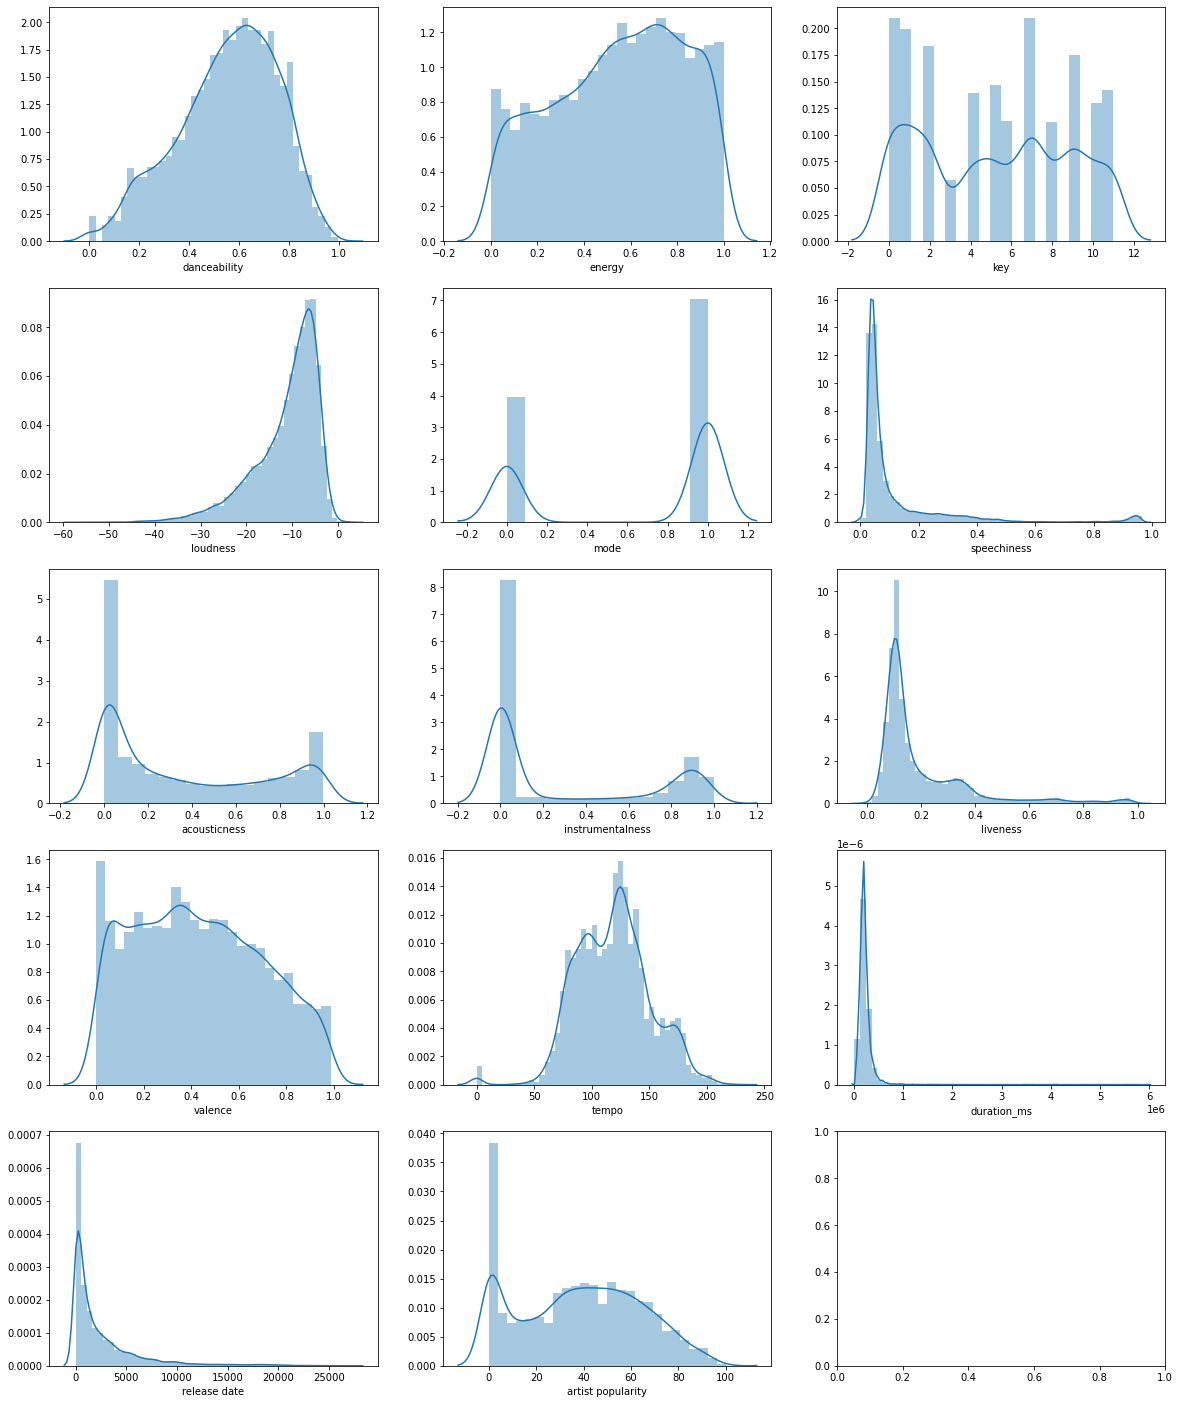

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(all_data[feature_cols[i]], ax=axs.flat[i])

### Using log to transform long tail distributions

In [241]:
import numpy as np

long_tails = ["speechiness","liveness", "duration_ms", "release date"]
for long_tail in long_tails:
    all_data_transformed[long_tail] = np.log(all_data_transformed[long_tail])
    
all_data_transformed.replace([float("inf"), float("-inf")], np.nan, inplace=True)
all_data_transformed.dropna(inplace=True)

/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Dropping Outliers

In [242]:
for feature in feature_cols:
    x =  all_data_transformed[feature]
    x = x[x.between(x.quantile(0.05), x.quantile(.95))] # without outliers
    all_data_transformed[feature] = x
all_data_transformed.dropna(inplace=True)

### Using MinMaxScaler to Scale Data

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

features_transformed = scaler.fit_transform(all_data_transformed[feature_cols])
features_transformed = pd.DataFrame(features_transformed, columns=feature_cols)

In [244]:
features = features_transformed
target = all_data_transformed['popularity'] / 100
target.reset_index(drop=True, inplace=True)

### Feature selection

In [245]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression

# X_train, X_test, y_train, y_test = train_test_split(features, target)

# select = SelectKBest(score_func = f_regression)
# select.fit(X_train, y_train)

# X_train_selected = select.transform(X_train)
# X_test_selected = select.transform(X_test)


In [246]:
print(features.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'release date', 'artist popularity'],
      dtype='object')


In [247]:
# select.get_support()

In [248]:
len(features)

3671

In [249]:
len(target)

3671

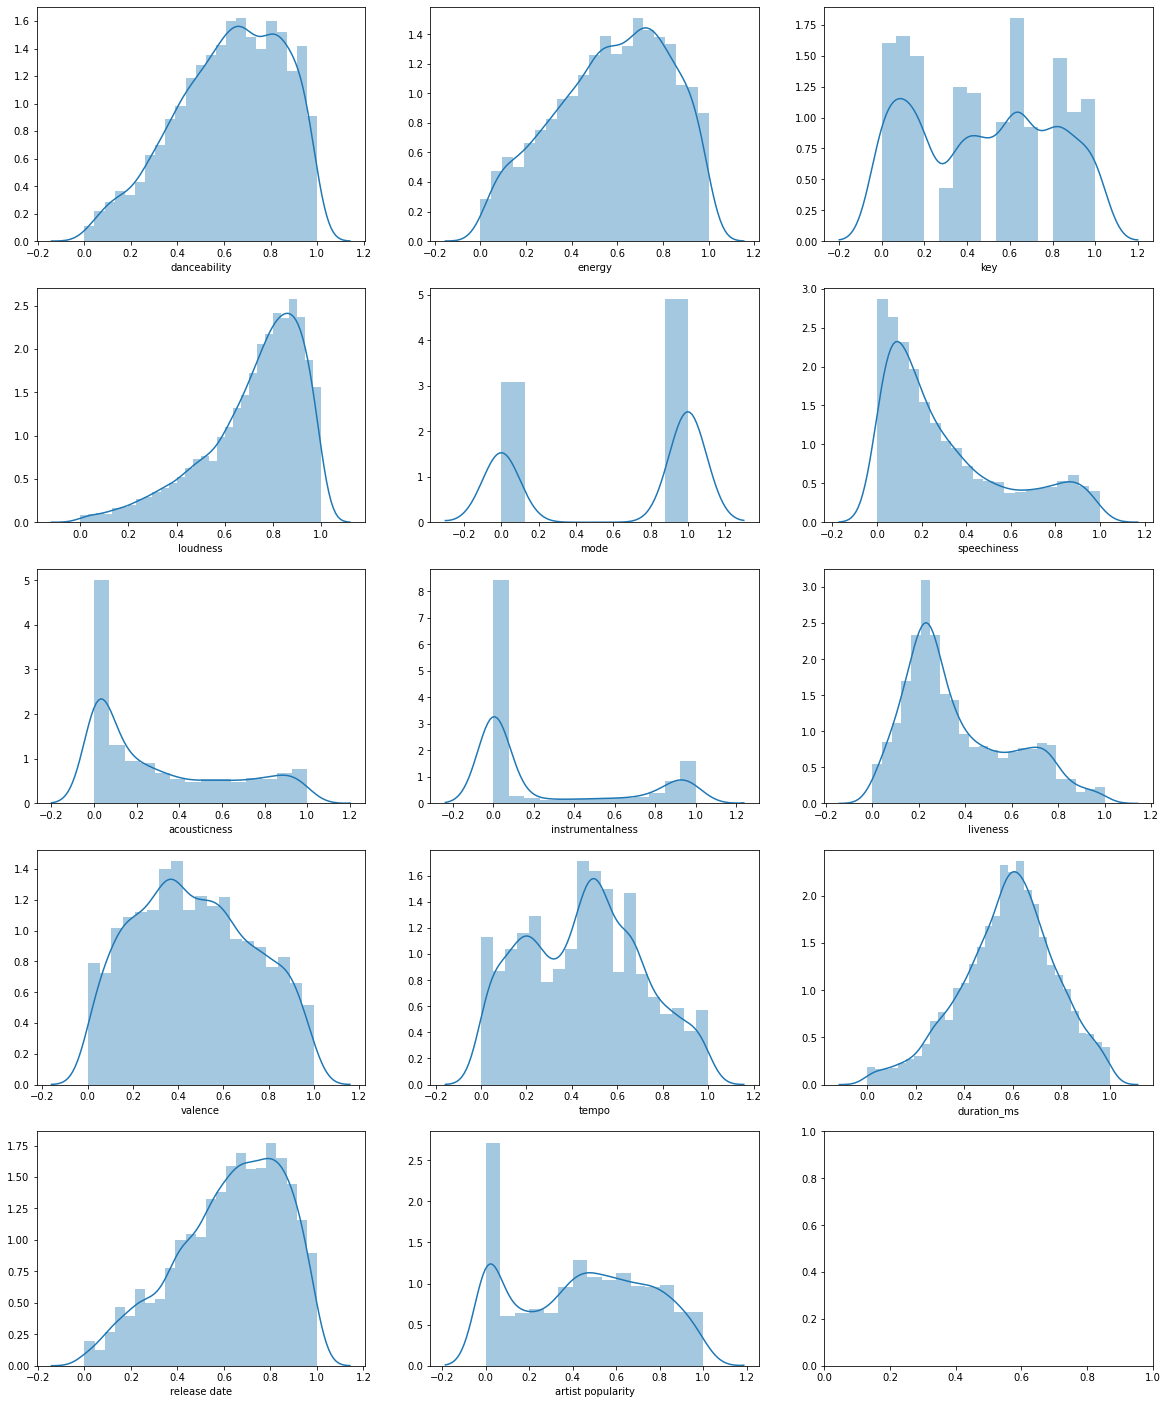

In [250]:
fig, axs = plt.subplots(5, 3, figsize=(20, 25))

for i in range(len(feature_cols)):
    sns.distplot(features[feature_cols[i]], ax=axs.flat[i])

## 3.2. Data Exploration
* Generate appropriate data visualizations for your key variables identified in the previous section
* You should have at least three visualizations (and at least two different visualization types)
* For each visualization provide an explanation regarding the variables involved and an interpretation of the graph.
* If you are using Plotly, insert your visualizations as images as well (upload the graph images to an online source, e.g. github, and embed those into the cells in Jupyter Notebook). This is a requirement.


### Distributions for Features 

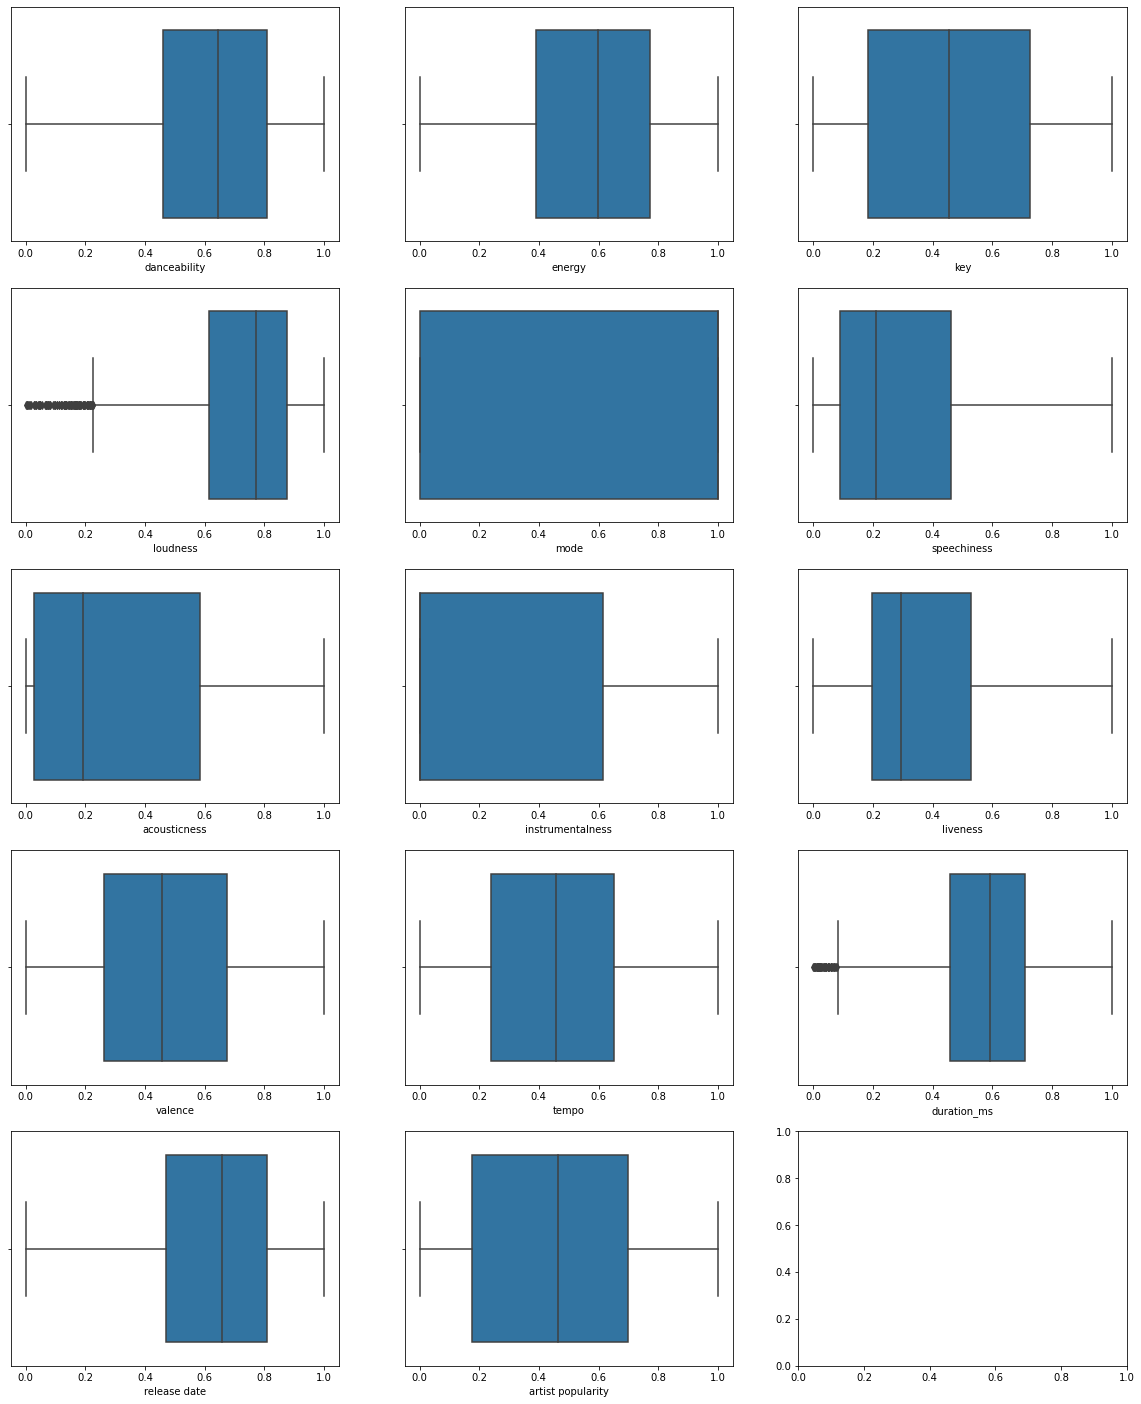

In [251]:
import seaborn as sns
fig, axs = plt.subplots(5, 3, figsize=(20, 25))


for i in range(len(feature_cols)):
    sns.boxplot(features[feature_cols[i]], ax=axs.flat[i])

### Heatmap for Correlations Across Feature Variables

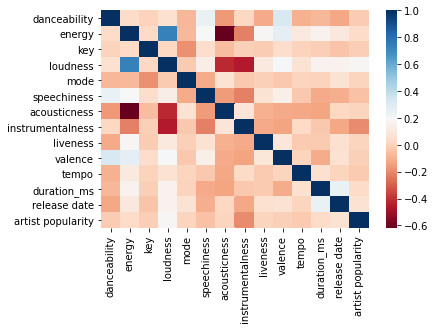

In [252]:
sns.heatmap(features.corr(), cmap ="RdBu")

## Visualizing Features vs. Target Correlation

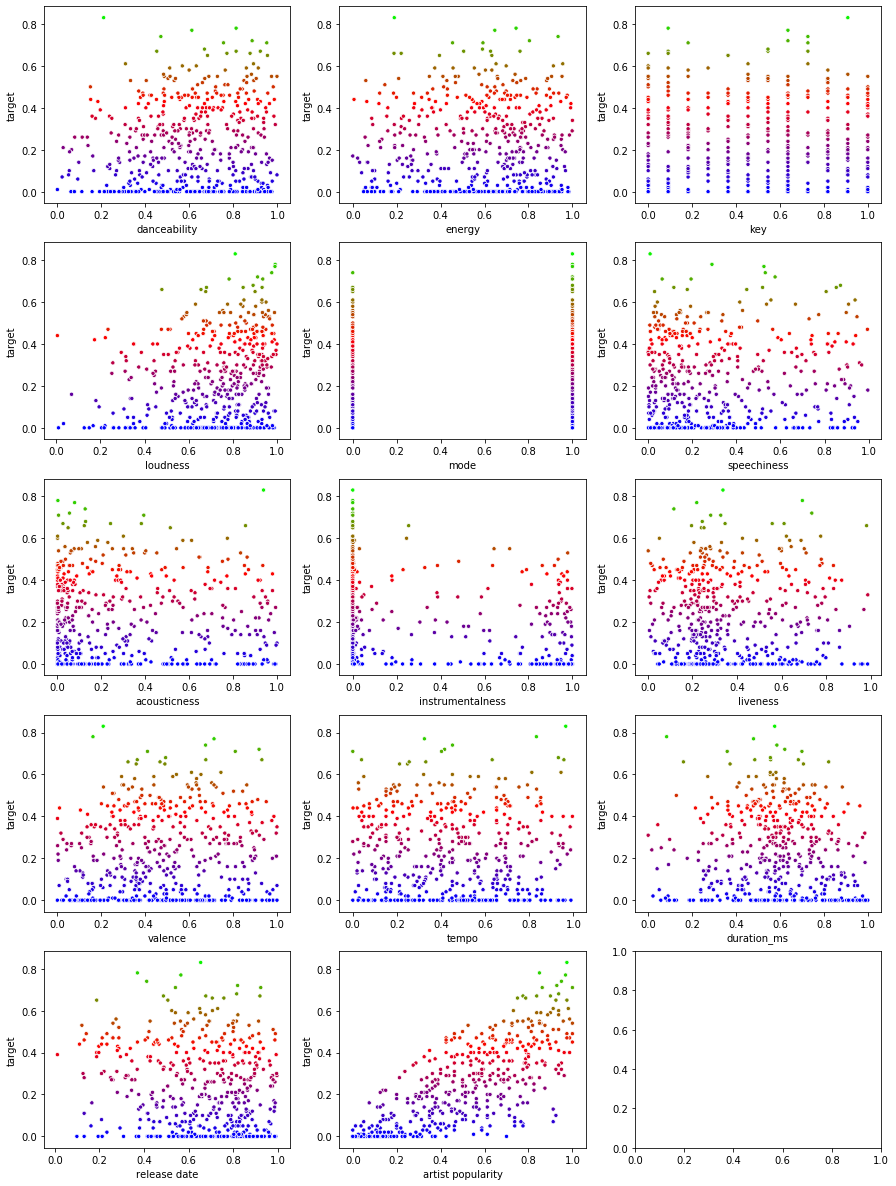

In [253]:
all_data_copy = features.copy()

all_data_copy["target"] = target

all_data_samp = all_data_copy.sample(500)
fig, axs = plt.subplots(5,3 , figsize=(15, 21))


for i in range(len(feature_cols)):
    sns.scatterplot(all_data_samp[feature_cols[i]], all_data_samp["target"], 
                   hue = all_data_copy["target"], 
                    size = 10, 

#                     size = all_data_samp["artist popularity"], 
#                   sizes=(20,100), 
                    legend=False, 
                    palette="brg",
                    ax=axs.flat[i])

In [254]:
len(features)

3671

### 3.3. Model Construction
* Conduct your hypothesis test(s) here.
* For your machine learning question(s), use the Training, Validation, and Testing approach through GridSearch
* Apply machine learning algorithms (apply at least three different algorithms)
* Train your algorithms

First, we need to split the data into training and testing sets. This will allow us to train our model with the training set, and then test it with the testing set after tuning some of the parameters

In [255]:
from sklearn.model_selection import train_test_split # imports the relevant method

features.dropna(inplace=True)

def split_the_dataset(features, target):
    # splits the data into training and testing sets
    return train_test_split(features, target, random_state=3000)

X_train, X_test, y_train, y_test = split_the_dataset(features, target)

Since we  will be testing 5 machine learning algorithms, we can define a dictionary with the regression estimators so we can apply them in an iteration statement.

In [256]:
# imports the relevant methods
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

# creates an estimators dictionary with the regression names and objects
estimators = {"Linear Regression": LinearRegression(), 
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "k-Nearest Neighbor": KNeighborsRegressor(),
              "Support Vector Machine": LinearSVR(max_iter = 100000)}

We are now ready to apply our algorithms. We can apply the algorithms through an iteration statement, shown below.

In [257]:
# applies the models to the training data
def apply_models():
    estimator_model = dict() # creates a dictionary to store the models
    
    for estimator_name, estimator_object in estimators.items(): # for each estimator in the estimators dictionary
        model = estimator_object.fit(X=X_train, y=y_train) # fit the training data to the model
        estimator_model[estimator_name] = model # add the model to the dictionary
        
    return estimator_model

In [30]:
estimator_model = apply_models() 

/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Now, we can pivot to our hypothesis testing. The hypothesis our project will test is that songs that are released within the past 90 days will have a high popularity value. For this hypothesis, the independent variable is the song’s days since release and the dependent variable is the popularity index. 

The null hypothesis is that songs released within the past 90 days will lead to a popularity value similar to songs that were not released within the past 90 days.

First, we can get the relevant data into one dataframe. In this case, we need the release date and popularity score 

In [259]:
release_date = all_data['release date'] # gets all the release dates from the clean data
pop = all_data['popularity'] # getts all the popularity scores from the clean data

data = pd.merge(release_date, pop, left_index = True, right_index = True) # merges the two columns into one dataframe

In [260]:
data.head()

,release date,popularity
0,3962.0,35
1,549.0,27
2,87.0,20
3,5.0,0
4,3083.0,4


Now, we can manipulate the release column to group it our binary independent variable - songs released within 90 days vs songs released before 90 days. We can do this by writing a function to transform the values and applying this function to the dataframe.

In [261]:
# determines if a song was released within 90 days or not
def within_90_days(days):
    if (days <= 90): 
        return "Within 90 days"
    else:
        return "Before 90 days"

data['release date'] = data['release date'].map(within_90_days) # maps the function to the release date column

Now the release date column has been transformed to match the independent variable.

In [262]:
data.head()

,release date,popularity
0,Before 90 days,35
1,Before 90 days,27
2,Within 90 days,20
3,Within 90 days,0
4,Before 90 days,4


We can now produce the descriptive stats (count, mean, std, and sem) for the data.

In [263]:
# groups the data by the IV and aggregates by the count, mean, std, and sem
def describe_data(data, IV, DV):
    # resulting dataframe produces an aggregation for each DV, so only include the given DV column
    return data.groupby(IV).agg(["count", "mean", "std", "sem"])[DV] 

descriptives = describe_data(data, 'release date', 'popularity')
descriptives

,count,mean,std,sem
release date,,,,
Before 90 days,8430,21.891815,20.636811,0.224765
Within 90 days,1488,20.460349,19.435297,0.503837


We can now conduct our hypothesis test using a one-way ANOVA. The below function takes a dataframe and the names of the IV and DV and conducts a one-way ANOVA on the dataframe. It calculates the F-test values, checks for assumptions, and performs post-hoc comparisons. The function does not assume anything about the data except that there are 2 independent variables (in this case, before and within 90 days of release).

In [264]:
# imports the relevant methods/libaries
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def oneway_ANOVA(data, IV, DV):
    # creates a dataframe with the descriptives of the data set to get the different IV level names
    descriptives = describe_data(data, IV, DV)
    
    # gets the names of the 2 different IV levels
    lv1 = descriptives.index[0]
    lv2 = descriptives.index[1]
    
    # gets the values within the data which correspond to each IV level
    lv1_data = data[data[IV] == lv1][DV]
    lv2_data = data[data[IV] == lv2][DV]
    
    # calculates the two degrees of freedom    
    df1 = len(descriptives) - 1
    df2 = (len(lv1_data) - 1) + (len(lv2_data) - 1)
    
    # runs the f-test with the 2 levels
    f_test = stats.f_oneway(lv1_data, lv2_data)
    
    # gets the f statistic and p-value and rounds them accordingly
    f = round(f_test[0], 2)
    p = round(f_test[1], 4)
    
    # gets the Levene Results to check for equality of variances
    levene_results = stats.levene(lv1_data, lv2_data)

    # checks to see if the assumption is met and sets the message to a variable
    assumption_msg = met_assumption(levene_results[1], 0.05)
        
    # gets the Shapiro Results to check for normality
    shapiro_lv1 = stats.shapiro(lv1_data)
    shapiro_lv2 = stats.shapiro(lv2_data)
    
    # checps to see if the assumption is met and sets the message to a variable
    assumption1_msg = met_assumption(shapiro_lv1[1], 0.05)
    assumption2_msg = met_assumption(shapiro_lv2[1], 0.05)
    
    # gets the Post-hoc test results
    mc = MultiComparison(data[DV], data[IV])
    tukey_result = mc.tukeyhsd()

    # prints the analysis with proper formatting
    return print("-----------------------\nONE-WAY ANOVA RESULTS\n-----------------------\n\nF-test\n-----------------------\nF("
                 + str(df1) +"," + str(df2) + ") =", str(f) + ", p =", str(p) 
                 + "\n\n\nAssumption Checks\n-----------------------\n\nAssumption of Equality of Variances:\n\t" 
                 + str(levene_results) + "\n\t" + assumption_msg + "\n\nAssumption of Normality:\n\t" 
                 + lv1, ":", str(shapiro_lv1) + "\n\t" + assumption1_msg + "\n\n\t" 
                 + lv2, ":", str(shapiro_lv2) + "\n\t" + assumption2_msg + "\n\n\t" 
                 + "\nPost-hoc Tests\n-----------------------\n\n"+ str(tukey_result))


# helper function to check if a given result meets the p threshold
def met_assumption(result, threshold):
    # if the result is larger than the threshold, the asssumption is met
    if result > threshold:
        return "Assumption is met. p >" + str(threshold)
    # else the assumption is not met
    else:
        return "Assumption is not met. p < " + str(threshold)

In [265]:
oneway_ANOVA(data, "release date", "popularity")

-----------------------
ONE-WAY ANOVA RESULTS
-----------------------

F-test
-----------------------
F(1,9916) = 6.19, p = 0.0129


Assumption Checks
-----------------------

Assumption of Equality of Variances:
	LeveneResult(statistic=7.992486217657203, pvalue=0.004706593489737574)
	Assumption is not met. p < 0.05

Assumption of Normality:
	Before 90 days : ShapiroResult(statistic=0.9001554846763611, pvalue=0.0)
	Assumption is not met. p < 0.05

	Within 90 days : ShapiroResult(statistic=0.895344078540802, pvalue=1.1564984561525474e-30)
	Assumption is not met. p < 0.05

	
Post-hoc Tests
-----------------------

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
Before 90 days Within 90 days  -1.4315 0.0129 -2.5593 -0.3037   True
--------------------------------------------------------------------


/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your **validation set**
    * Use at least two different metrics 
* Evaluate your results from multiple ML models and hypothesis tests
    * What was the performance of each algorithm in plain English? Is there any indication of overfitting/underfitting?
    * Was there a significant difference? Use the template from lecture slides when reporting the results of your hypothesis testing.

After constructing our model, we can now evaluate the accuracy of each estimator by looking at two different metrics - the r-squared value, and the mean of all cross-validation scores. We can start by looking at the r-squared  score for the training data.

In [266]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# evaluates the performance of each algorithm on the training set 
def performance_percentage_split():
    for estimator_name, estimator_fit in estimator_model.items(): # for each estimator
        # prints the r-squared value for each estimator's training set
        print(estimator_name + ":\n\tR-squared value for training set: ", r2_score(y_train, estimator_fit.predict(X_train)), "\n",
             "\tMean-squared error for training set: ", mean_squared_error(y_train, estimator_fit.predict(X_train)), "\n")

In [267]:
performance_percentage_split()

Linear Regression:
	R-squared value for training set:  0.6516164267201455 
 	Mean-squared error for training set:  0.013172753183366552 

Ridge:
	R-squared value for training set:  0.6516035610827471 
 	Mean-squared error for training set:  0.013173239646790763 

Lasso:
	R-squared value for training set:  0.0 
 	Mean-squared error for training set:  0.03781106284475978 

k-Nearest Neighbor:
	R-squared value for training set:  0.6804119928434085 
 	Mean-squared error for training set:  0.012083962223029425 

Support Vector Machine:
	R-squared value for training set:  0.6484946893920027 
 	Mean-squared error for training set:  0.018395556248672378 



Now, we can perform a similar iteration statement through cross-validation to get the mean accuracy and standard deviation of each estimator.

In [268]:
# imports the relevant functions 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def performance_cv():
    kfold = KFold(n_splits=10, random_state=3000, shuffle=True)

    for estimator_name, estimator_object in estimators.items(): # for each estimator 
        # get the cv score and print it 
        scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
        print(estimator_name + ": \n\t" + f'mean accuracy = {scores.mean():.2%}, ' + f'standard deviation = {scores.std():.2%}' +"\n")

In [269]:
performance_cv()

Linear Regression: 
	mean accuracy = 64.58%, standard deviation = 3.11%

Ridge: 
	mean accuracy = 64.59%, standard deviation = 3.11%

Lasso: 
	mean accuracy = -0.21%, standard deviation = 0.27%

k-Nearest Neighbor: 
	mean accuracy = 54.29%, standard deviation = 3.69%



/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Support Vector Machine: 
	mean accuracy = 64.32%, standard deviation = 3.27%



/Users/glennbillman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 3.5. Model Optimization and 3.6 Model Testing

In [270]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.tree import DecisionTreeRegressor
select = SelectFromModel(DecisionTreeRegressor(),threshold='.25*mean')

We will now try to optamize the model by reducing the number of variables included using model based feature selection. We are using the Deciscion Tree Regressor to assign importances to each value and then testing the preformance of the model with fewer variables on the Linear Regression and Ridge models, which preformed best. Eliminating features that are not weighted highly will help reduce the risk of overfitting the model to include features that do not have a strong relationship with popularity.

In [271]:
select.fit(X_train,y_train)

#transform the data to only include the features that meet the threshold
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

#display the features selected by the decision tree regression
print('\nVariables included:',end=' ')
t_f_list = select.get_support()
for i in range(len(t_f_list)):
    if t_f_list[i]==True:
        print(features.columns[i],end=' ')

print('Linear Regression:\n')

#fit original testing and training data to the model for comparison purposes
model=LinearRegression().fit(X=X_train,y=y_train)

print('Original results:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test)))

#fit reduced feature testing and training data to the model
model=LinearRegression().fit(X=X_train_selected,y=y_train)

print('\nWith selected features:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train_selected)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test_selected)))
        
print('-----')
print('Ridge:\n')

#fit original testing and training data to the model for comparison purposes
model=Ridge().fit(X=X_train,y=y_train)

print('Original results:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test)))

#fit reduced feature testing and training data to the model
model=Ridge().fit(X=X_train_selected,y=y_train)

print('\nWith selected features:')
print('\tR-squared value for training set:', r2_score(y_train, model.predict(X_train_selected)))
print('\tR-squared value for testing set:', r2_score(y_test, model.predict(X_test_selected)))    


Variables included: danceability energy key loudness speechiness acousticness instrumentalness liveness valence tempo duration_ms release date artist popularity Linear Regression:

Original results:
	R-squared value for training set: 0.6516164267201455
	R-squared value for testing set: 0.643851026499153

With selected features:
	R-squared value for training set: 0.6515745360407544
	R-squared value for testing set: 0.6434508050843692
-----
Ridge:

Original results:
	R-squared value for training set: 0.6516035610827471
	R-squared value for testing set: 0.6437772699028571

With selected features:
	R-squared value for training set: 0.6515616767203919
	R-squared value for testing set: 0.643375675009197


These results did not improve the model and made it slightly worse. A higher threshold made the model markedly worse. It seems that including all the features is the best course of action, and that we are not overfitting the model by using all features.

Another way we will try to improve our model is with hyperparameter turning. Running a grid search will allow us to see the optimal combinations of parameters.

In [272]:
#linear regression does not have an alpha param, but has some other features we can set
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [273]:
from sklearn.model_selection import GridSearchCV

#parameters we will tune
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

#executing grid search with linear regression
grid_search= GridSearchCV(LinearRegression(),param_grid,cv=5)

#testing performance of the grid search 
grid_search.fit(X=X_train, y=y_train)

print('Linear Regression:')
print('\tBest parameters:', grid_search.best_params_)
print('\tBest cross-validation score:', grid_search.best_score_)
print('\tTest set score:',grid_search.score(X_test,y_test))

print('\nRidge:')

#alpha values we will tune
ridge_param_grid = {'alpha':[.8,.9,1,1.1,1.2,1.3]}

#executing grid search with ridge
grid_search= GridSearchCV(Ridge(),ridge_param_grid,cv=5)

#testing performance of the grid search 
grid_search.fit(X=X_train, y=y_train)

print('\tBest parameters:', grid_search.best_params_)
print('\tBest cross-validation score:', grid_search.best_score_)
print('\tTest set score:',grid_search.score(X_test,y_test))

Linear Regression:
	Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
	Best cross-validation score: 0.646355708710433
	Test set score: 0.6453599720443395

Ridge:
	Best parameters: {'alpha': 1.1}
	Best cross-validation score: 0.6463571878578206
	Test set score: 0.6437687322237089


Tuning this model did not improve this model. The model selected the default values for the Linear Regression. For the Ridge Regression, we are modifying alpha, which changes the complexity of the model. The first dictionary of aplha values explored was {'alpha':[.001, .01, .1, 1, 10, 100]}. This resulted in 1 being chosen as the best parameter, which is the default. The next dictionary used included more values close to 1 to try to narrow down on the true best parameter, and 1.1 was selected.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Interpret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
    * Based on your findings, can we use the features in your dataset to predict the outcome variable you identified using the algorithms you've applied? (It is okay if the answer is no. We're interested in the process, not the performance of the model.)
* For your hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work
    * (e.g., get more data/features, perform another analysis, etc.)

### 4.1 Interpretation of findings from algorithms
We compared 5 different machine learning algorithms: Linear Regression, Ridge, Lasso, kNN, and SVM. The algorithms with the best performance were Linear Regression, Ridge, and SVM. kNN ended up having the highest r-squared value, but the lowest mean accuracy. Based on this, Linear Regression, Ridge, and SVM should be used for this predictive model since they yielded the most consistent and highest scores on the training and testing data.

Overall, these algorithms were fairly inaccurate in determining the popularity of a song. Mean accuracy and r-squared values ranged from around 55-65%, which is not particularly high. Even after tuning our features and selecting the best performing ones, these metrics did not significantly change. Because of this, we cannot use the features in our dataset to predict song popularity using these algorithms. The correlation between a lot of our features and the target was not high to begin with. This coupled with other factors (such as outliers) yielded a low overall performance and accuracy rate.

### 4.2 Interpreation of findings from hypothesis

The hypothesis our project will test was that songs that are released within the past 90 days will have a high popularity value. The independent variable was the number of days since a songs release and the dependent variable is the popularity index. To reject the null hypothesis that songs released in the las 90 days are not more popular than songs released earlier, we needed a p-value of less than .05, which would indicate that there was less than a 5 percent chance that we would see our observed values by chance without a relationship between release date and popularity. Our ANOVA test resulted in a high F-statistic, or the differences in  means from the two groups. The p-value was .0129, so we reject the null hypothesis and conclude that songs released in the last 90 days are more popular than songs released earlier than that. 

However, the assumption or normality and the assumption of equality of variances were not met. Violating the normality assumption puts us at a higher risk for ANOVA being an inapropriate test, as it assumes but does not require that data be normally distributed. Violating the assumption of equal variance increases the chance of a type 1 error, or a false positive. This is concerning as we have rejected the null hypothesis, and therefore could have made a type 1 error.  

### 4.3 Conclusion
It seems that the features we were using to predict song popularity may not have been the best in that they were not strongly correlated. For future work, it may be useful to look into other features. The majority of the features are realted to the audio of the track, but it may be helpful to look into non-audio features because they dont seem to correlate well with popularity. In may be interesting to look into sentiment and mood features that can be extracted from text.
        
Also, there may be better results if this is turned into a classification problem where the populairity scores are binned into certain buckets. 

It also may be interesting to combine features into meta features to extract more. This could be done with some sort of neural network and may provide more accuracy. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Describe each team member's contributions to the report (who did what in each section)
* Remember this is a team effort!
* Each member of your team will provide peer evaluation of other team members. Your final grade on the project will be based on those peer evaluations. A survey will be shared after the deadline for this deliverable.

In [276]:
for col in features.columns:
    print(features[col].min(), end=", ")
    print(features[col].max())

0.0, 1.0
0.0, 1.0000000000000002
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0000000000000002
0.0, 0.9999999999999999
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 1.0
0.0, 0.9999999999999998
0.0, 1.0


In [277]:
print(target.min(), end=", ")
print(target.max())

0.0, 0.85


In [278]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release date,artist popularity
0,0.821981,0.953876,0.363636,0.918484,0.0,0.757703,0.035686,0.000000,0.656741,0.930094,0.531643,0.690835,0.286828,0.51875
1,0.798762,0.744628,0.727273,0.962909,1.0,0.379964,0.055200,0.000000,0.111140,0.377840,0.632926,0.528939,0.850499,0.81875
2,0.969040,0.434132,1.000000,0.848345,1.0,0.019584,0.616890,0.960596,0.547609,0.790283,0.162253,0.311261,0.421928,0.47500
3,0.863777,0.389133,0.090909,0.387975,1.0,0.925228,0.205174,0.000543,0.114350,0.297448,0.150466,0.724074,0.857808,0.00000
4,0.032508,0.098886,0.363636,0.326439,0.0,0.187031,0.557636,0.136315,0.619332,0.001165,0.141215,0.330700,0.939541,0.45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3666,0.380805,0.797503,0.363636,0.790194,1.0,0.156321,0.039569,0.913738,0.270691,0.091227,0.251529,0.566885,0.848122,0.63750
3667,0.716718,0.815502,0.636364,0.789724,1.0,0.038177,0.017910,0.000000,0.704018,0.719212,0.402095,0.591905,0.789113,0.72500
3668,0.113003,0.056137,0.000000,0.438558,1.0,0.083927,0.249104,0.087859,0.382431,0.001515,0.648752,0.585041,0.684029,0.36250
3669,0.712074,0.673754,0.272727,0.717939,0.0,0.061232,0.050296,0.970181,0.179170,0.176279,0.551699,0.485263,0.646412,0.31250
